# Cinestats: Movie Data Analytics Project

**Cinestats** is a data analytics project focused on analyzing and extracting insights from movie-related data. The dataset includes various details about popular movies, such as ratings, genres, release dates, and more. The goal of this project is to explore data cleaning techniques, apply statistical methods, and visualize relationships in the data.

This project was initiated because of a deep interest in movies and a desire to enhance data analytics skills through real-world applications. The aim is to provide meaningful insights into trends in the movie industry, including popular genres, top-rated movies, and the correlation between movie popularity and user ratings.

## Key Objectives:
- Data cleaning and preprocessing
- Exploratory data analysis (EDA) and data visualization
- Identifying trends and relationships in movie data

## 4 Main Questions:
1. Is there a correlation between movie genre and popularity?
2. What is the relationship between release date and popularity?
3. Are there any seasonal trends in movie popularity based on release dates?
4. Which month should we release a movie?


License: MIT License
Copyright (c) 2024 Chayoot Kositwanich

### Collect Data

In [ ]:
import requests
import csv

# API Key and URL
api_key = 'API_KEY'
base_url = 'https://api.themoviedb.org/3/movie/popular'
csv_file_path = 'movies_data.csv'

# Define CSV fieldnames based on the full set of fields
fieldnames = [
    "adult", "backdrop_path", "genre_ids", "id", "original_language", "original_title", 
    "overview", "popularity", "poster_path", "release_date", "title", "video", 
    "vote_average", "vote_count"
]

# Initialize the CSV file
with open(csv_file_path, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writeheader()

    # Loop through pages 1 to 500
    for page in range(1, 501):
        url = f'{base_url}?api_key={api_key}&language=en-US&page={page}'
        response = requests.get(url)

        if response.status_code == 200:
            data = response.json()
            movies = data.get("results", [])

            # Write each movie's data into the CSV
            for movie in movies:
                writer.writerow({
                    "adult": movie.get("adult", ""),
                    "backdrop_path": movie.get("backdrop_path", ""),
                    "genre_ids": movie.get("genre_ids", ""),
                    "id": movie.get("id", ""),
                    "original_language": movie.get("original_language", ""),
                    "original_title": movie.get("original_title", ""),
                    "overview": movie.get("overview", ""),
                    "popularity": movie.get("popularity", ""),
                    "poster_path": movie.get("poster_path", ""),
                    "release_date": movie.get("release_date", ""),
                    "title": movie.get("title", ""),
                    "video": movie.get("video", ""),
                    "vote_average": movie.get("vote_average", ""),
                    "vote_count": movie.get("vote_count", "")
                })
        else:
            print(f"Failed to fetch data for page {page}. Status code: {response.status_code}")
            break

print(f"Data has been saved to {csv_file_path}")

Data has been saved to movies_data.csv


In [ ]:
import requests

genre_dict = dict()

# ใส่ API Key ของคุณที่นี่
API_KEY = 'API_KEY'

# URL สำหรับดึงรายชื่อ Genre
url = f'https://api.themoviedb.org/3/genre/movie/list?api_key={API_KEY}'

# ส่งคำขอ
response = requests.get(url)

# ตรวจสอบผลลัพธ์
if response.status_code == 200:
    genres = response.json()["genres"]
    genre_dict = { genre['id']: genre['name'] for genre in genres }
    print(genre_dict)
else:
    print(f"Error: {response.status_code}, {response.text}")

{28: 'Action', 12: 'Adventure', 16: 'Animation', 35: 'Comedy', 80: 'Crime', 99: 'Documentary', 18: 'Drama', 10751: 'Family', 14: 'Fantasy', 36: 'History', 27: 'Horror', 10402: 'Music', 9648: 'Mystery', 10749: 'Romance', 878: 'Science Fiction', 10770: 'TV Movie', 53: 'Thriller', 10752: 'War', 37: 'Western'}


### EDA (Exploratory Data Analysis)

In [46]:
import pandas as pd

# Import csv file
df = pd.read_csv("/Users/khunfloat/Documents/cinestats/movies_data.csv")

df.head()

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count
0,False,/tElnmtQ6yz1PjN1kePNl8yMSb59.jpg,"[16, 12, 10751, 35]",1241982,en,Moana 2,After receiving an unexpected call from her wa...,6947.740,/yh64qw9mgXBvlaWDi7Q9tpUBAvH.jpg,2024-11-27,Moana 2,False,7.041,256
1,False,/3V4kLQg0kSqPLctI5ziYWabAZYF.jpg,"[878, 28, 12]",912649,en,Venom: The Last Dance,Eddie and Venom are on the run. Hunted by both...,3207.406,/aosm8NMQ3UyoBVpSxyimorCQykC.jpg,2024-10-22,Venom: The Last Dance,False,6.427,976
2,False,/6lE2e6j8qbtQR8aHxQNJlwxdmKV.jpg,"[28, 80, 53]",974453,en,Absolution,An aging ex-boxer gangster working as muscle f...,1575.362,/cNtAslrDhk1i3IOZ16vF7df6lMy.jpg,2024-10-31,Absolution,False,6.000,91
3,False,/iR79ciqhtaZ9BE7YFA1HpCHQgX4.jpg,"[27, 9648]",1100782,en,Smile 2,"About to embark on a new world tour, global po...",1399.358,/ht8Uv9QPv9y7K0RvUyJIaXOZTfd.jpg,2024-10-16,Smile 2,False,6.600,802
4,False,/mQZJoIhTEkNhCYAqcHrQqhENLdu.jpg,"[16, 878, 10751]",1184918,en,The Wild Robot,"After a shipwreck, an intelligent robot called...",1499.226,/wTnV3PCVW5O92JMrFvvrRcV39RU.jpg,2024-09-12,The Wild Robot,False,8.400,3268


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   adult              10000 non-null  bool   
 1   backdrop_path      9756 non-null   object 
 2   genre_ids          10000 non-null  object 
 3   id                 10000 non-null  int64  
 4   original_language  10000 non-null  object 
 5   original_title     10000 non-null  object 
 6   overview           9907 non-null   object 
 7   popularity         10000 non-null  float64
 8   poster_path        9958 non-null   object 
 9   release_date       9967 non-null   object 
 10  title              10000 non-null  object 
 11  video              10000 non-null  bool   
 12  vote_average       10000 non-null  float64
 13  vote_count         10000 non-null  int64  
dtypes: bool(2), float64(2), int64(2), object(8)
memory usage: 957.2+ KB


### Cleaning Data

In [48]:
# Check that is some data null
df.isnull().sum()

adult                  0
backdrop_path        244
genre_ids              0
id                     0
original_language      0
original_title         0
overview              93
popularity             0
poster_path           42
release_date          33
title                  0
video                  0
vote_average           0
vote_count             0
dtype: int64

In [49]:
df.drop("backdrop_path", axis=1, inplace=True)
df.drop("video", axis=1, inplace=True)
df.drop("original_title", axis=1, inplace=True)

df = df[df['vote_count'] != 0]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9667 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   adult              9667 non-null   bool   
 1   genre_ids          9667 non-null   object 
 2   id                 9667 non-null   int64  
 3   original_language  9667 non-null   object 
 4   overview           9633 non-null   object 
 5   popularity         9667 non-null   float64
 6   poster_path        9667 non-null   object 
 7   release_date       9666 non-null   object 
 8   title              9667 non-null   object 
 9   vote_average       9667 non-null   float64
 10  vote_count         9667 non-null   int64  
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 840.2+ KB


In [50]:
import ast

dd = df.copy()


# สร้าง one-hot encoding สำหรับ genre_ids
df_genres = pd.DataFrame(df['genre_ids'].apply(lambda x: [int(i) for i in ast.literal_eval(x)]), index=df.index)

all_genres = set([genre for sublist in df_genres['genre_ids'] for genre in sublist])

all_genres

{12,
 14,
 16,
 18,
 27,
 28,
 35,
 36,
 37,
 53,
 80,
 99,
 878,
 9648,
 10402,
 10749,
 10751,
 10752,
 10770}

In [51]:
# สร้าง one-hot encoding สำหรับทุก genre ที่ปรากฏใน 'genre_ids'
for genre in all_genres:
    df_genres[genre] = df_genres['genre_ids'].apply(lambda x: 1 if isinstance(x, list) and genre in x else 0)

# แสดงผลลัพธ์
df_genres.head()

,genre_ids,10752,12,14,16,18,10770,27,28,10402,35,36,37,9648,53,80,99,878,10749,10751
0,"[16, 12, 10751, 35]",0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,"[878, 28, 12]",0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,"[28, 80, 53]",0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0
3,"[27, 9648]",0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,"[16, 878, 10751]",0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [52]:
dd = pd.concat([dd, df_genres], axis=1)

dd.drop("genre_ids", axis=1, inplace=True)

dd.head()

,adult,id,original_language,overview,popularity,poster_path,release_date,title,vote_average,vote_count,...,35,36,37,9648,53,80,99,878,10749,10751
0,False,1241982,en,After receiving an unexpected call from her wa...,6947.740,/yh64qw9mgXBvlaWDi7Q9tpUBAvH.jpg,2024-11-27,Moana 2,7.041,256,...,1,0,0,0,0,0,0,0,0,1
1,False,912649,en,Eddie and Venom are on the run. Hunted by both...,3207.406,/aosm8NMQ3UyoBVpSxyimorCQykC.jpg,2024-10-22,Venom: The Last Dance,6.427,976,...,0,0,0,0,0,0,0,1,0,0
2,False,974453,en,An aging ex-boxer gangster working as muscle f...,1575.362,/cNtAslrDhk1i3IOZ16vF7df6lMy.jpg,2024-10-31,Absolution,6.000,91,...,0,0,0,0,1,1,0,0,0,0
3,False,1100782,en,"About to embark on a new world tour, global po...",1399.358,/ht8Uv9QPv9y7K0RvUyJIaXOZTfd.jpg,2024-10-16,Smile 2,6.600,802,...,0,0,0,1,0,0,0,0,0,0
4,False,1184918,en,"After a shipwreck, an intelligent robot called...",1499.226,/wTnV3PCVW5O92JMrFvvrRcV39RU.jpg,2024-09-12,The Wild Robot,8.400,3268,...,0,0,0,0,0,0,0,1,0,1


In [53]:
len(dd.columns)

29

### Data Analysis


#### Coorelation between popularity and vote_average

I found that the correlation between popularity and vote_average is 0.0552, which is very weak.

In [54]:
correlation = dd['popularity'].corr(dd['vote_average'])

print("Coorelation popularity-vote count:", correlation)

Coorelation popularity-vote count: 0.05524758945416765


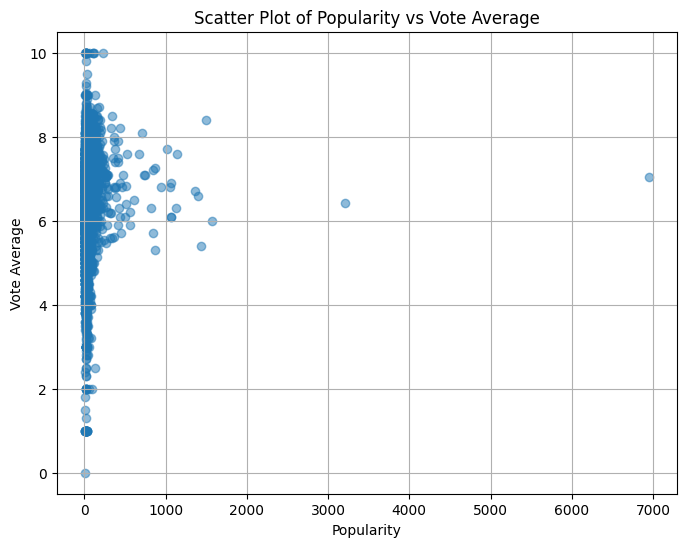

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(dd['popularity'], dd['vote_average'], alpha=0.5)
plt.title('Scatter Plot of Popularity vs Vote Average')
plt.xlabel('Popularity')
plt.ylabel('Vote Average')
plt.grid(True)
plt.show()

I saw that there're many movies which vote_count around 0. I decide to investigate this factor.

#### vote_count factor

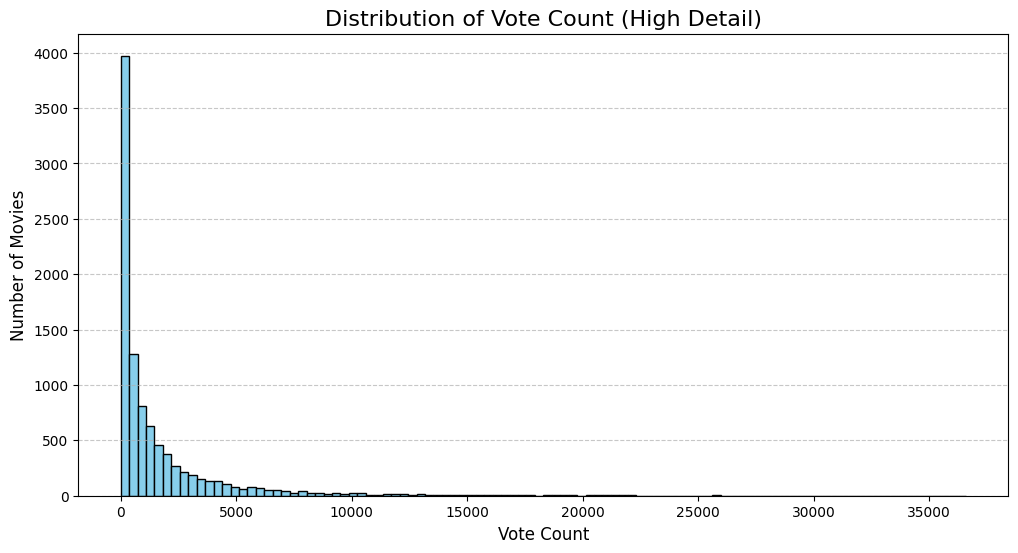

In [56]:
import matplotlib.pyplot as plt

# สร้างกราฟ Histogram
plt.figure(figsize=(12, 6))
plt.hist(dd['vote_count'], bins=100, color='skyblue', edgecolor='black')  # เพิ่ม bins ให้ละเอียดขึ้น
plt.title('Distribution of Vote Count (High Detail)', fontsize=16)
plt.xlabel('Vote Count', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

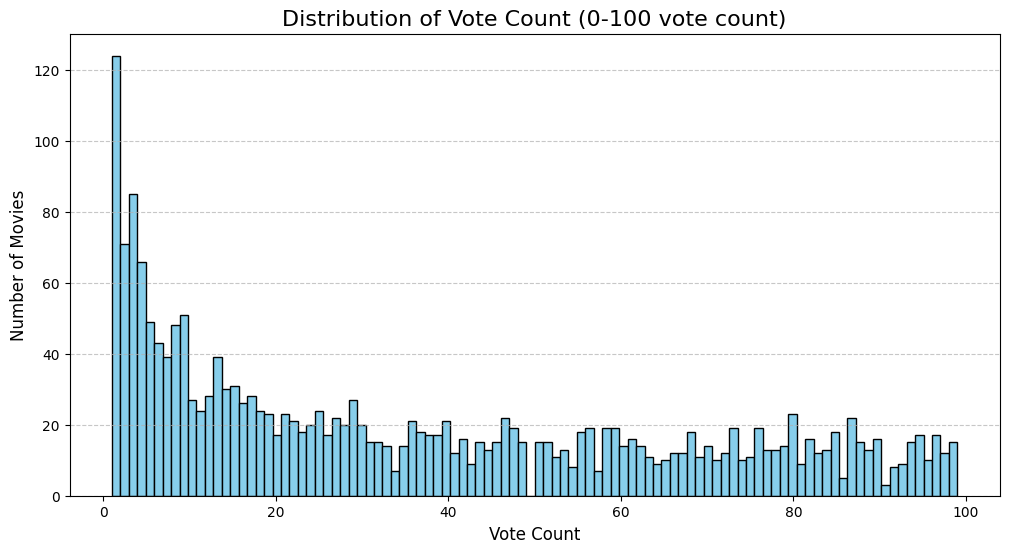

In [24]:
import matplotlib.pyplot as plt

f_dd = dd[dd["vote_count"] < 100]

# สร้างกราฟ Histogram
plt.figure(figsize=(12, 6))
plt.hist(f_dd['vote_count'], bins=100, color='skyblue', edgecolor='black')  # เพิ่ม bins ให้ละเอียดขึ้น
plt.title('Distribution of Vote Count (0-100 vote count)', fontsize=16)
plt.xlabel('Vote Count', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [25]:
# สรุปสถิติของ vote_count
summary = dd['vote_count'].describe()

# แสดงผล
print(summary)

count     9667.000000
mean      1781.566774
std       3221.555771
min          1.000000
25%        134.000000
50%        592.000000
75%       1906.500000
max      36601.000000
Name: vote_count, dtype: float64


I'm trying to filter out the outlier of vote_count with IQR method

In [26]:
Q1 = df['vote_count'].quantile(0.25)  # 25th percentile
Q3 = df['vote_count'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile Range

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(Q1, Q3, IQR)
print(lower_bound, upper_bound)


filtered_df = dd[(dd['vote_count'] >= lower_bound) & (dd['vote_count'] <= upper_bound)]

134.0 1906.5 1772.5
-2524.75 4565.25


In [27]:
# สรุปสถิติของ vote_count
summary = filtered_df['vote_count'].describe()

# แสดงผล
print(summary)

count    8675.000000
mean      908.901326
std      1077.532709
min         1.000000
25%       109.000000
50%       456.000000
75%      1348.000000
max      4561.000000
Name: vote_count, dtype: float64


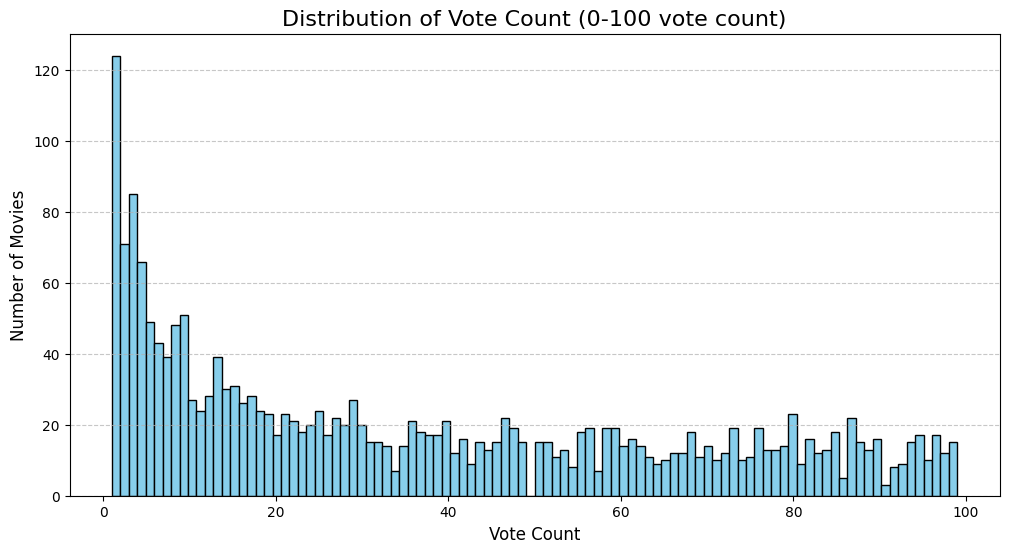

In [28]:
import matplotlib.pyplot as plt

f_dd = filtered_df[filtered_df["vote_count"] < 100]

# สร้างกราฟ Histogram
plt.figure(figsize=(12, 6))
plt.hist(f_dd['vote_count'], bins=100, color='skyblue', edgecolor='black')  # เพิ่ม bins ให้ละเอียดขึ้น
plt.title('Distribution of Vote Count (0-100 vote count)', fontsize=16)
plt.xlabel('Vote Count', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

IQR Method for this situation may be not work because this data doesn't distribute like normal distribution. Therefore, We I will try to use another medthod to filter the outliers out.

Then, I choose the alternative one which is Modified Z-Score Method

In [29]:
data = dd['vote_count']

# คำนวณ Median
median = data.median()

# คำนวณ MAD (Median Absolute Deviation)
mad = (data - median).abs().median()

# คำนวณ Modified Z-Score
modified_z_scores = 0.6745 * (data - median) / mad

# กำหนดค่าที่ถือว่าเป็น outliers
outliers = modified_z_scores.abs() > 3.5

# ลบ outliers
df_no_outliers = dd[~outliers]

df_no_outliers["vote_count"].describe()


count    8258.000000
mean      753.953015
std       845.464040
min         1.000000
25%       101.000000
50%       402.500000
75%      1165.000000
max      3422.000000
Name: vote_count, dtype: float64

In [30]:
df_no_outliers[df_no_outliers["vote_count"] == 1]["vote_count"].count()

np.int64(124)

Most movies have a vote_count of 1. After attempting to remove outliers using the IQR method, vote_count = 1 remained because the lower boundary was -2524.75. Then, I tried using the Modified Z-score, which references the median, to remove outliers with a threshold of Z=3.5. However, the vote_count = 1 values still persisted. This suggests that vote_count is unreliable, as a single vote can skew the vote_average, making it an invalid feature for analysis. Therefore, I recommend excluding vote_count and vote_average from further analysis due to its low reliability.

#### Is there a correlation between movie genre and popularity?

In [71]:
genre_columns = [col for col in dd.columns if type(col) == int]

genre_popularity_corr = dd[genre_columns].corrwith(dd['popularity'])

correlation_results = pd.DataFrame({
    'Genre_ID': genre_popularity_corr.index,
    'Popularity_Correlation': genre_popularity_corr.values
}).sort_values(by='Popularity_Correlation', ascending=False)

correlation_results['Genre_Name'] = correlation_results['Genre_ID'].map(genre_dict)

correlation_results

,Genre_ID,Popularity_Correlation,Genre_Name
7,28,0.051540,Action
1,12,0.051085,Adventure
3,16,0.046013,Animation
16,878,0.042484,Science Fiction
18,10751,0.040746,Family
2,14,0.016672,Fantasy
6,27,0.009281,Horror
13,53,0.000890,Thriller
14,80,-0.001663,Crime
9,35,-0.005159,Comedy


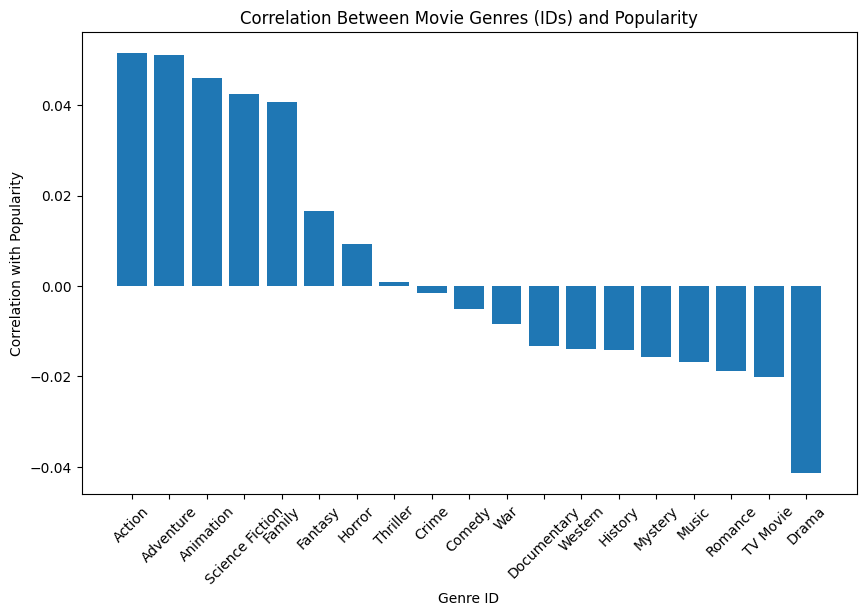

In [73]:
# Plot the correlation as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(correlation_results['Genre_Name'], correlation_results['Popularity_Correlation'])
plt.title('Correlation Between Movie Genres (IDs) and Popularity')
plt.xlabel('Genre ID')
plt.ylabel('Correlation with Popularity')
plt.xticks(rotation=45)
plt.show()

There is a weak correlation between movie genres and popularity. Some genres, such as Action, Adventure, and Animation, show a slightly positive correlation with popularity, meaning movies in these genres tend to be a bit more popular. However, the correlation values are generally small, indicating that genre alone does not strongly determine a movie's popularity.

On the other hand, genres like Drama and Romance show a very slight negative correlation, suggesting that movies in these genres are slightly less popular, but again, the correlation is not significant.

In conclusion, while there is a small correlation between movie genre and popularity, other factors likely play a more important role in determining a movie’s success.

####  What is the relationship between release date and popularity?

In [76]:
dd['release_date'] = pd.to_datetime(dd['release_date'], errors='coerce')

dd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9667 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   adult              9667 non-null   bool          
 1   id                 9667 non-null   int64         
 2   original_language  9667 non-null   object        
 3   overview           9633 non-null   object        
 4   popularity         9667 non-null   float64       
 5   poster_path        9667 non-null   object        
 6   release_date       9666 non-null   datetime64[ns]
 7   title              9667 non-null   object        
 8   vote_average       9667 non-null   float64       
 9   vote_count         9667 non-null   int64         
 10  10752              9667 non-null   int64         
 11  12                 9667 non-null   int64         
 12  14                 9667 non-null   int64         
 13  16                 9667 non-null   int64         
 14  18           

In [77]:
dd['release_year'] = dd['release_date'].dt.year
dd['release_month'] = dd['release_date'].dt.month
dd['release_day_of_week'] = dd['release_date'].dt.dayofweek

dd.head()

,adult,id,original_language,overview,popularity,poster_path,release_date,title,vote_average,vote_count,...,9648,53,80,99,878,10749,10751,release_year,release_month,release_day_of_week
0,False,1241982,en,After receiving an unexpected call from her wa...,6947.740,/yh64qw9mgXBvlaWDi7Q9tpUBAvH.jpg,2024-11-27,Moana 2,7.041,256,...,0,0,0,0,0,0,1,2024.0,11.0,2.0
1,False,912649,en,Eddie and Venom are on the run. Hunted by both...,3207.406,/aosm8NMQ3UyoBVpSxyimorCQykC.jpg,2024-10-22,Venom: The Last Dance,6.427,976,...,0,0,0,0,1,0,0,2024.0,10.0,1.0
2,False,974453,en,An aging ex-boxer gangster working as muscle f...,1575.362,/cNtAslrDhk1i3IOZ16vF7df6lMy.jpg,2024-10-31,Absolution,6.000,91,...,0,1,1,0,0,0,0,2024.0,10.0,3.0
3,False,1100782,en,"About to embark on a new world tour, global po...",1399.358,/ht8Uv9QPv9y7K0RvUyJIaXOZTfd.jpg,2024-10-16,Smile 2,6.600,802,...,1,0,0,0,0,0,0,2024.0,10.0,2.0
4,False,1184918,en,"After a shipwreck, an intelligent robot called...",1499.226,/wTnV3PCVW5O92JMrFvvrRcV39RU.jpg,2024-09-12,The Wild Robot,8.400,3268,...,0,0,0,0,1,0,1,2024.0,9.0,3.0


In [79]:
correlation = dd['release_year'].corr(dd['popularity'])
print(f"Correlation between release year and popularity: {correlation}")

Correlation between release year and popularity: 0.0844757262159853


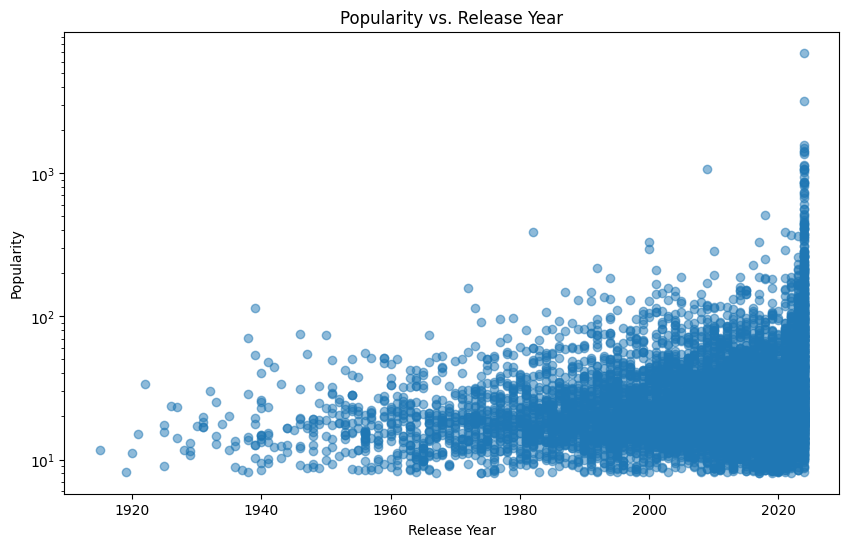

In [82]:
plt.figure(figsize=(10, 6))
plt.scatter(dd['release_year'], dd['popularity'], alpha=0.5)
plt.yscale('log')
plt.title('Popularity vs. Release Year')
plt.xlabel('Release Year')
plt.ylabel('Popularity')
plt.show()


1. Weak Positive Correlation: Frome the correlation between release year and popularity are 0.0844757262159853 that is a weak positive correlation between release year and popularity. This means that, generally, as movies are released in more recent years, their popularity tends to be slightly higher. However, this correlation is not very strong, indicating that other factors, not just the release year, contribute significantly to a movie's popularity.

2. Trend Analysis: From the plot, it appears that newer movies (released after the 2000s) show higher popularity, especially with the sharp increase in popularity observed in recent years. This could be due to factors such as better marketing, higher budget production, or increased access to movies through streaming platforms.

#### Are there any seasonal trends in movie popularity based on release dates?

In [83]:
correlation = dd['release_month'].corr(dd['popularity'])
print(f"Correlation between release month and popularity: {correlation}")

Correlation between release month and popularity: 0.03782509422990779


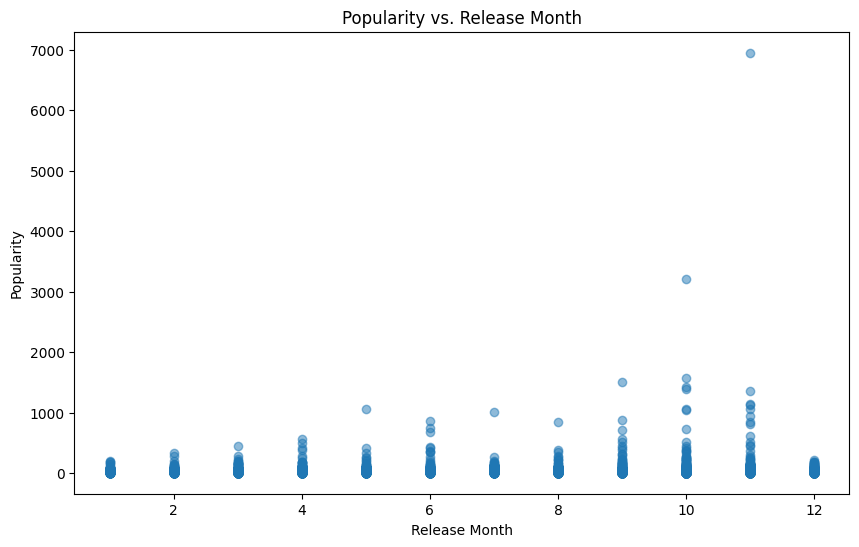

In [87]:
plt.figure(figsize=(10, 6))
plt.scatter(dd['release_month'], dd['popularity'], alpha=0.5)
plt.title('Popularity vs. Release Month')
plt.xlabel('Release Month')
plt.ylabel('Popularity')
plt.show()

The correlation between the release month and popularity is 0.0378, which is very close to zero. This suggests that there is no significant correlation between the month a movie is released and its popularity.

In other words, the release month does not seem to have a strong impact on how popular a movie is. Popularity might depend on other factors, such as the genre, marketing, or overall movie quality, rather than the time of year it was released.

#### Which month should we release a movie?

In [88]:
release_month_counts = dd['release_month'].value_counts().sort_index()

release_month_counts

release_month
1.0      574
2.0      712
3.0      792
4.0      675
5.0      666
6.0      757
7.0      760
8.0      886
9.0      940
10.0    1046
11.0     914
12.0     944
Name: count, dtype: int64

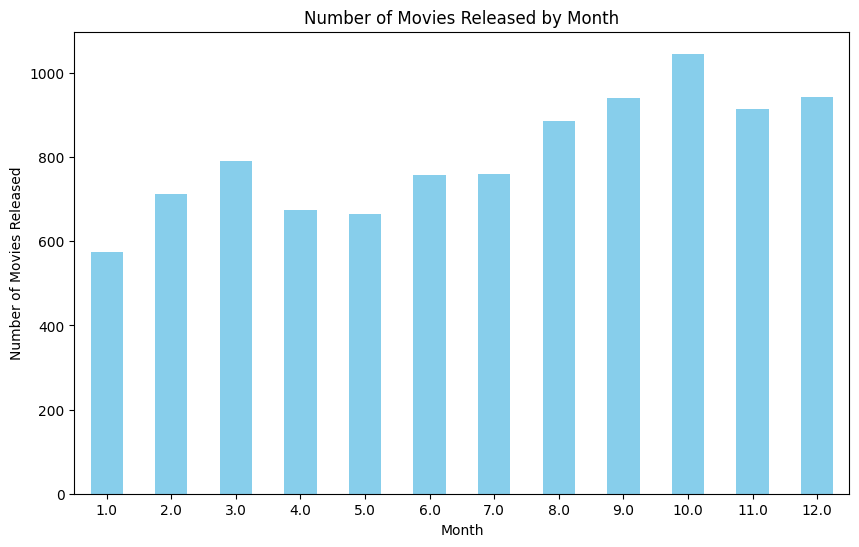

In [89]:
plt.figure(figsize=(10,6))
release_month_counts.sort_index().plot(kind='bar', color='skyblue')
plt.title("Number of Movies Released by Month")
plt.xlabel("Month")
plt.ylabel("Number of Movies Released")
plt.xticks(rotation=0)
plt.show()

From the graph showing the number of movies released by month, we can summarize that
1. The months with the highest number of movie releases are September (9), October (10), and December (12), each with more than 1,000 releases.
2. The month with the least number of releases is January (1), with around 600 movies.
3. The highet number of movie in early of year is March (3), with around 800 movies.

This trend suggests that the end of the year (September to December) tends to see the highest volume of movie releases, possibly due to holidays or preparations for the holiday season market. However, if you want to release a movie early in the year, the trend suggests March.

## Conclusion

We analyzed a movie dataset to explore factors influencing popularity. We found that vote_count was unreliable due to many movies having a value of 1, so it was excluded from further analysis. The correlation between genre and popularity was weak, with some genres slightly more popular but not significantly. Release year showed a weak positive correlation with popularity, while release month had no meaningful impact. Overall, movie popularity is influenced by multiple factors beyond genre, release year, and month.